In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
import csv
import sys
sys.path.append('/storage/home/hcoda1/4/ashelby8/Manitoba/pyNab/src/')
import nabPy as Nab
sys.path.append('/storage/home/hcoda1/4/ashelby8/calibration/calibration/')
from FitClass import SnCalibration
from config import conf
import Funcs
import pandas as pd
import pylab as py
np.set_printoptions(threshold=sys.maxsize)

In [2]:
pd.set_option("display.max_colwidth", 15)

In [3]:
runs = [1374, 1375, 1376, 1377, 1379, 1381, 1383, 1385, 1389]

In [221]:
data = []
for i in range(len(runs)):
    with open('/storage/home/hcoda1/4/ashelby8/calibration/calibration/output%d.csv'%runs[i]) as f:
        csv.DictReader(f)
        data.append(pd.read_csv(f))

In [222]:
dataAll = pd.concat(data,ignore_index = True)

In [223]:
dataAll

,run,pixel,Bias Voltage,Proton,Proton Energy,Cd109,Sn113,Date Time [UTC],trap rise,trap length,trap decay,ecap,chi2_e,xray,chi2_x,CE,Xray,CE hist,Xray hist
0,1374,76,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 6.0331278...,1.921193,[ 5.6294665...,162.031478,3,5,[ 2 0 1 ...,[3168 2573 ...
1,1374,77,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 6.0516611...,1.499595,[ 7.1145814...,713.398264,3,5,[ 1 0 3 ...,[2814 2346 ...
2,1374,78,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 4.6452241...,1.589457,[ 1.3837002...,144.740371,3,5,[ 3 5 2 ...,[718 704 52...
3,1374,87,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 5.1178510...,1.563294,[ 1.0438133...,613.971270,3,5,[ 3 2 2 ...,[3541 2691 ...
4,1374,88,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 5.3112285...,1.416138,[ 8.9545040...,4304.986979,3,5,[ 1 0 1 ...,[4471 4313 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1389,116,-320,False,0,False,True,2022-02-03 ...,1250,50,1250,0,0.000000,[ 5.4639511...,3.723187,0,0,0,[343 258 20...
167,1389,121,-320,False,0,False,True,2022-02-03 ...,1250,50,1250,[ 3.9086141...,0.106462,[ 2.8126853...,4.654543,1,5,[0 0 0 0 0 ...,[1254 1199 ...
168,1389,122,-320,False,0,False,True,2022-02-03 ...,1250,50,1250,[ 4.6459667...,0.085904,[ 7.8339433...,234.303397,1,4,[1 0 0 0 0 ...,[3470 2821 ...
169,1389,123,-320,False,0,False,True,2022-02-03 ...,1250,50,1250,0,0.000000,[ 3.3105692...,9.184776,0,4,0,[182 175 14...


In [224]:
dataAll[dataAll['run']==1374]

,run,pixel,Bias Voltage,Proton,Proton Energy,Cd109,Sn113,Date Time [UTC],trap rise,trap length,trap decay,ecap,chi2_e,xray,chi2_x,CE,Xray,CE hist,Xray hist
0,1374,76,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 6.0331278...,1.921193,[ 5.6294665...,162.031478,3,5,[ 2 0 1 ...,[3168 2573 ...
1,1374,77,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 6.0516611...,1.499595,[ 7.1145814...,713.398264,3,5,[ 1 0 3 ...,[2814 2346 ...
2,1374,78,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 4.6452241...,1.589457,[ 1.3837002...,144.740371,3,5,[ 3 5 2 ...,[718 704 52...
3,1374,87,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 5.1178510...,1.563294,[ 1.0438133...,613.971270,3,5,[ 3 2 2 ...,[3541 2691 ...
4,1374,88,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 5.3112285...,1.416138,[ 8.9545040...,4304.986979,3,5,[ 1 0 1 ...,[4471 4313 ...
5,1374,96,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 3.8691884...,1.314555,[ 3.9452053...,230.245110,3,5,[ 1 1 2 ...,[1444 1186 ...
6,1374,97,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[4.69671298...,0.978911,[ 1.0352885...,1211.305488,3,5,[ 1 0 3 ...,[3966 3159 ...
7,1374,98,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 4.4177367...,1.318333,[ 6.0488195...,3560.630228,3,5,[ 2 2 0 ...,[3173 3015 ...
8,1374,101,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 2.8909534...,0.793712,[ 8.1614011...,421.709794,3,5,[ 2 1 1 ...,[710 627 50...
9,1374,103,-300,False,0,False,True,2022-01-27 ...,1250,50,1250,[ 1.6431157...,0.525802,[ 5.4570089...,99.022632,2,5,[ 1 2 1 ...,[889 746 55...


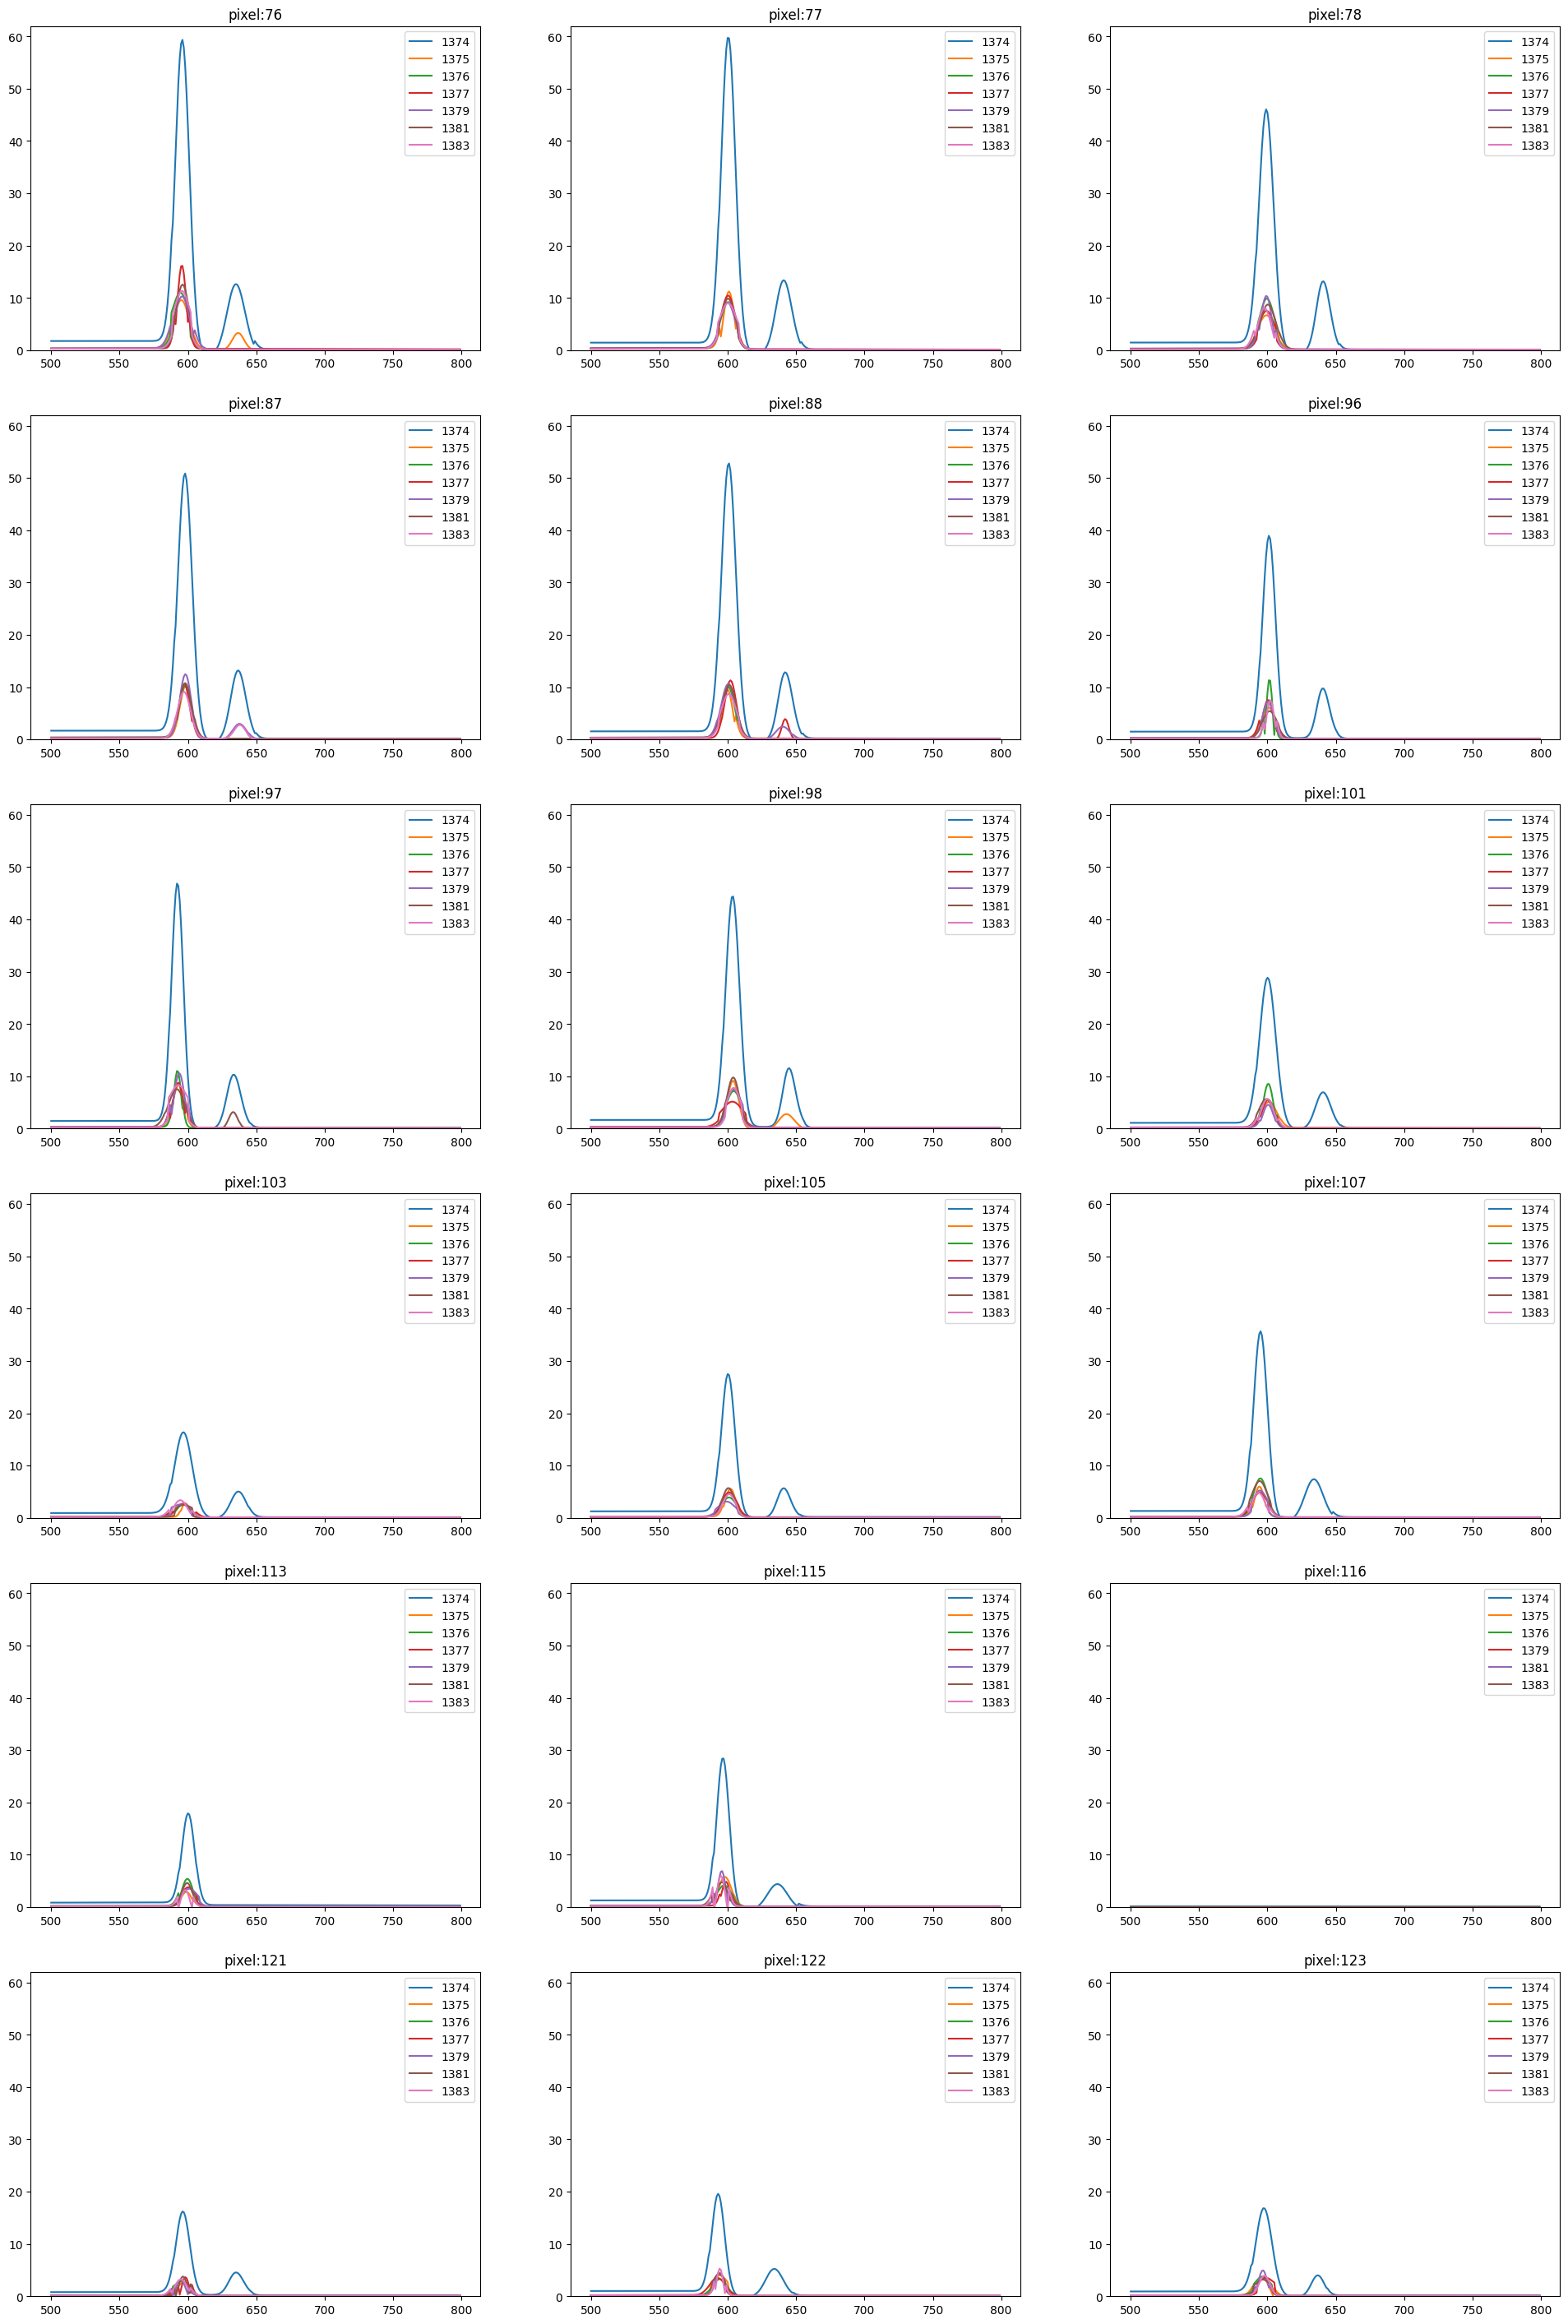

In [226]:
nrows,ncols=7,3
py.figure(figsize=(8*ncols,6*nrows))


x = np.arange(500,800)
conf['xray'] = 'OFF'
cnt = 0
for j in np.int16(dataAll[dataAll['run']==1374]['pixel'][:18]):
    cnt +=1
    ax=py.subplot(nrows,ncols,cnt)
    ax.set_title('pixel:%d'%j)
    ax.set_ylim(0,62)
    for i in range(7):
        
        if dataAll[dataAll['pixel']==j].iloc[i]['CE']==3:
            #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture'] = 'three'
            Sn = SnCalibration()

            #plot all the fits with the same initilization on the same graph
            

            #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

        if dataAll[dataAll['pixel']==j].iloc[i]['CE']==2:

            #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture'] = 'two'
            Sn = SnCalibration()

            #plot all the fits with the same initilization on the same graph
            

            #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

        if dataAll[dataAll['pixel']==j].iloc[i]['CE']==1:

            #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture'] = 'one'
            Sn = SnCalibration()

            #plot all the fits with the same initilization on the same graph
            

            #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()


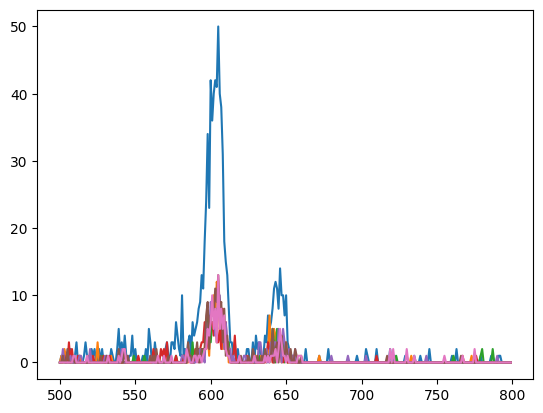

In [220]:
x = np.arange(500,800)
for i in range(7):
    conf['capture'] = 'three'
    Sn = SnCalibration()
        
        #plot all the fits with the same initilization on the same graph
        
        
        #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
#     plt.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==116].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])

    plt.plot(x,np.float64(dataAll[dataAll['pixel']==98].iloc[i]['CE hist'].replace('[','').replace(']','').split())[200:500])

In [131]:
#set up coumn naming scheme for the fit parameters
names = []
for i in range(10):
    names.append('p%d'%i)
names_xray = []
for i in range(16):
    names_xray.append('p%d'%i)

In [207]:
#create the parameter data frames
df1 = {}
for i in range(len(names)):
    df1[names[i]] = {}
    for j in range(7):
        par_list = np.float64(dataAll[dataAll['pixel']==98].iloc[j]['ecap'].replace('[','').replace(']','').split()).tolist()
        
        #depending on the fit type used for each pixel, the numer of parameters obtained changes
        #need to add in empty slots for pixels with fewer to be able to construct the dataframe
        if len(par_list) != len(names):
            par_list.extend(['']*(len(names)-len(par_list)))
            
        df1[names[i]][j] = par_list[i]
ecap_data = pd.DataFrame(df1)

# df2 = {}
# for i in range(len(names_xray)):
#     df2[names_xray[i]] = {}
#     for j in range(len(data)):
#         par_list = np.float64(data['xray'][j].replace('[','').replace(']','').split()).tolist()
        
#         if len(par_list) != len(names_xray):
#             par_list.extend(['']*(len(names_xray)-len(par_list)))
            
#         df2[names_xray[i]][j] = par_list[i]
# xray_data = pd.DataFrame(df2)

In [208]:
ecap_data

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
0,44.177358,603.580753,7.185290,10.295023,644.303197,6.074948,0.354037,1.352264,-0.000076,-0.272008
1,9.347038,603.889305,5.887907,2.646590,642.336689,7.425708,-0.173737,0.51108,-0.000024,0.173892
2,6.084034,604.431758,7.517086,1.114711,-0.945900,0.000168,-0.877918,,,
3,3.667318,603.430606,9.930575,1.502235,-1.297018,0.000129,-1.327262,,,
4,5.102209,604.298355,7.201583,2.408603,-2.373674,0.000381,-1.932013,,,
5,9.566897,604.033985,6.466007,0.242532,-0.079580,0.000309,0.126443,,,
6,5.506018,604.334198,6.165799,2.313492,-2.157035,0.000233,-2.020281,,,


In [209]:
sum((ecap_data['p1']-np.mean(ecap_data['p1']))**2)/len(ecap_data['p1'])

0.12864353753910018

In [210]:
sum((ecap_data['p2']-np.mean(ecap_data['p2']))**2)/len(ecap_data['p2'])

1.5552008693971004

In [214]:
ecap_data['p2']

0    7.185290
1    5.887907
2    7.517086
3    9.930575
4    7.201583
5    6.466007
6    6.165799
Name: p2, dtype: float64

In [213]:
np.mean(ecap_data['p2'])

np.float64(7.193463817142857)

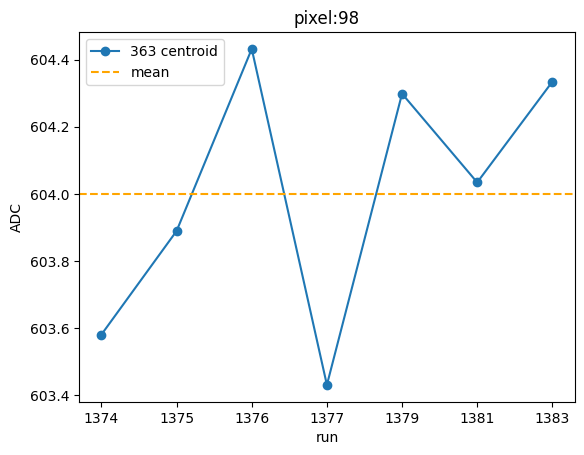

In [212]:
plt.plot(ecap_data['p1'],marker = 'o',label = '363 centroid')
plt.axhline(np.mean(ecap_data['p1']),linestyle = '--',color = 'orange',label = 'mean')
plt.title('pixel:98')

plt.xticks(np.arange(0,7),runs[0:7])
plt.xlabel('run')
plt.ylabel('ADC')
plt.legend()
plt.show()

In [171]:
np.mean(ecap_data['p1'])

np.float64(600.357253)